In [ ]:
import sys
import pandas as pd

# Load the dataset
df = pd.read_csv('car_dataset_2000_rows.csv')

# Display the first 10 rows to see the data structure
print("--- Dataset Preview ---")
display(df.head(10))

# Get a summary of the columns (Data Types and Non-Null counts)
print("\n--- Data Information ---")
df.info()

# Statistical summary of numerical columns
print("\n--- Statistical Summary ---")
display(df.describe())

--- Dataset Preview ---


,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
0,Suzuki,WagonR,2022,1.2,Hybrid,Manual,5950,Hatchback,AWD,6280794
1,Toyota,Corolla,2015,2.6,Electric,CVT,154572,Truck,AWD,1363381
2,Suzuki,Swift,2008,2.8,Petrol,Manual,46908,Sedan,AWD,7678389
3,Suzuki,Cultus,2018,2.1,Diesel,CVT,165760,Hatchback,FWD,6098764
4,Kia,Sportage,2023,2.5,Electric,Automatic,143133,Sedan,FWD,6689630
5,Hyundai,Tucson,2014,2.1,Hybrid,Automatic,88969,Hatchback,AWD,4280217
6,Honda,City,2010,3.1,Petrol,Manual,170178,Sedan,RWD,7310777
7,Toyota,Corolla,2007,3.9,Petrol,Automatic,32754,SUV,AWD,4096198
8,Hyundai,Elantra,2022,3.5,Petrol,Manual,63717,Truck,RWD,1640599
9,Toyota,Corolla,2011,3.9,Electric,Automatic,47378,Hatchback,FWD,4083514



--- Data Information ---
<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         2000 non-null   str    
 1   model         2000 non-null   str    
 2   year          2000 non-null   int64  
 3   engine_size   2000 non-null   float64
 4   fuel_type     2000 non-null   str    
 5   transmission  2000 non-null   str    
 6   mileage       2000 non-null   int64  
 7   car_type      2000 non-null   str    
 8   drive_type    2000 non-null   str    
 9   price         2000 non-null   int64  
dtypes: float64(1), int64(3), str(6)
memory usage: 156.4 KB

--- Statistical Summary ---


,year,engine_size,mileage,price
count,2000.00000,2000.000000,2000.000000,2.000000e+03
mean,2014.13250,2.396300,103180.273500,4.345622e+06
std,5.46158,0.928724,55391.847545,2.069889e+06
min,2005.00000,0.800000,5037.000000,8.012850e+05
25%,2009.00000,1.600000,55877.500000,2.585088e+06
50%,2014.00000,2.400000,102444.000000,4.304987e+06
75%,2019.00000,3.200000,149161.750000,6.099470e+06
max,2023.00000,4.000000,199898.000000,7.997116e+06


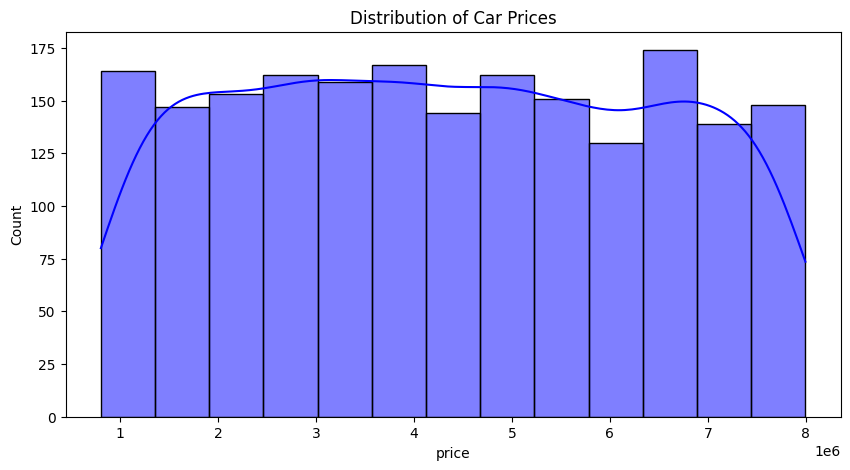

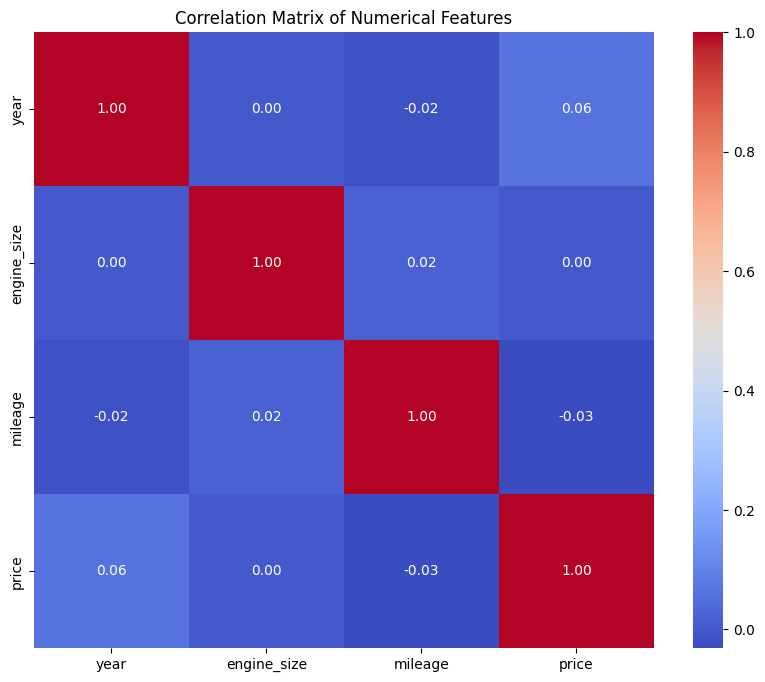

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualizing the Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.show()

# 2. Correlation Matrix (Numerical only)
plt.figure(figsize=(10, 8))
# We filter for numeric columns to avoid errors with strings
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to keep the original data safe
df_encoded = df.copy()
le = LabelEncoder()

# List of categorical columns to transform
categorical_cols = ['brand', 'model', 'fuel_type', 'transmission', 'car_type', 'drive_type']

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])

print("Data after Encoding:")
display(df_encoded.head())

Data after Encoding:


,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
0,3,16,2022,1.2,2,2,5950,0,0,6280794
1,4,7,2015,2.6,1,1,154572,3,0,1363381
2,3,14,2008,2.8,3,2,46908,2,0,7678389
3,3,8,2018,2.1,0,1,165760,0,1,6098764
4,2,13,2023,2.5,1,0,143133,2,1,6689630


In [9]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1600, 9)
Testing set size: (400, 9)


In [10]:
from sklearn.preprocessing import LabelEncoder

# We use a copy to keep the original for comparison
df_encoded = df.copy()
label_encoders = {}

categorical_features = ['brand', 'model', 'fuel_type', 'transmission', 'car_type', 'drive_type']

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le # We store these for the API later

print("Encoding Complete! Top 5 rows of numerical features:")
display(df_encoded.head())

Encoding Complete! Top 5 rows of numerical features:


,brand,model,year,engine_size,fuel_type,transmission,mileage,car_type,drive_type,price
0,3,16,2022,1.2,2,2,5950,0,0,6280794
1,4,7,2015,2.6,1,1,154572,3,0,1363381
2,3,14,2008,2.8,3,2,46908,2,0,7678389
3,3,8,2018,2.1,0,1,165760,0,1,6098764
4,2,13,2023,2.5,1,0,143133,2,1,6689630


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Define X and y
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 2. Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Evaluate
y_pred = rf_model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

R2 Score: -0.1003
Mean Absolute Error: 1870990.28


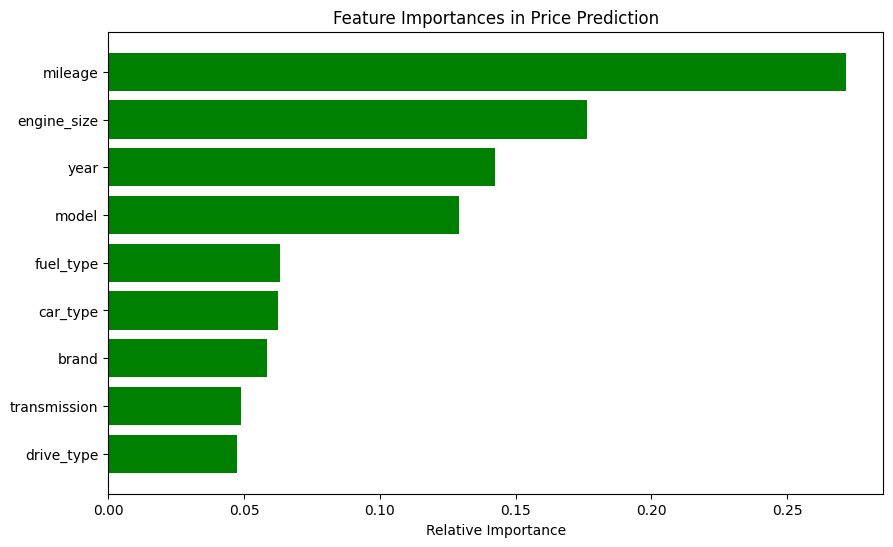

In [12]:
import numpy as np

# Get feature importance from the model
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Price Prediction')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'car_price_model.pkl')

# Save the label encoders (dictionary) so we can use them in the API
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save the list of feature columns to ensure the API uses the correct order
joblib.dump(list(X.columns), 'model_columns.pkl')

print("All artifacts saved successfully! You are ready to build the FastAPI backend.")

All artifacts saved successfully! You are ready to build the FastAPI backend.
